# <B>Project Title</b>

## Property valuation (regression): predicting the price of an apartment based on its characteristics and market scenarios in 2026

# <b>Project Goal </b>

## The goal of this project is to develop a machine learning model for estimating apartment prices and forecasting their market value for 2026 based on structural characteristics, geographic location, and scenario-based market assumptions.

# <b> Project Objectives </b>

## To achieve the stated goal, the following objectives were completed:

### <b>Data Collection and Loading</b>
A dataset of apartment listings was collected from the Krisha.kz real estate platform, containing information on prices, apartment characteristics, renovation status, and location.

### <b>Data Cleaning and Preparation</b>

cleaning price values from textual and currency symbols;

extracting numerical values from unstructured text fields (area, floor, ceiling height, construction year);

handling missing values using median imputation and logical default values;

removing duplicate listings.

### <b>Feature Engineering</b>

creation of additional features such as balcony count, parking level, and residential complex indicator;

encoding renovation condition as an ordinal variable;

one-hot encoding of city districts;

incorporation of geospatial features (distance to metro, number of schools, parks, shopping malls, and kindergarten density).

### <b>Exploratory Data Analysis (EDA)</b>

analysis of price distributions and identification of outliers;

examination of relationships between price, apartment size, and district;

interpretation of statistical patterns to guide preprocessing decisions.

### <b>Machine Learning Modeling and Evaluation</b>

training of Linear Regression, Random Forest, and Gradient Boosting models;

evaluation of model performance using MAE, RMSE, and R² metrics;

selection of the best-performing model based on test results.

### <b>Scenario-Based Forecasting for 2026</b>

construction of geo-profiles (poor, average, premium);

definition of pessimistic, baseline, and optimistic market growth scenarios;

estimation of apartment prices for 2026, including VAT adjustment

# <B>Project Relevance </b>
## This project is relevant for several reasons:

### <b>Economic Importance</b>
Real estate valuation plays a crucial role in investment decisions, mortgage lending, and property market analysis. Inaccurate pricing can lead to significant financial losses.

### <b>Practical Applicability</b>
The developed model can be used for:

preliminary apartment price estimation;

evaluation of location and infrastructure impact on property value;

scenario-based forecasting of future real estate prices.

### <b>Analytical Value</b>
The project demonstrates how machine learning techniques can be applied to real-world housing market data by combining structural, categorical, and geospatial features into an interpretable predictive model.

Overall, the project addresses the problem of reliable and interpretable real estate price prediction, making it valuable from both business and analytical perspectives.

# Data Preprocessing and Exploratory Data Analysis (EDA)
Data Cleaning

At the initial stage, a dataset of apartment listings collected from the Krisha.kz platform was loaded. The dataset contained a mix of numerical, categorical, and textual features, as well as a significant number of missing values caused by incomplete listings and unstructured text fields.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("krisha_details_raw.xls")
df

,url,price,address,flat.building,house.year,flat.floor,live.square,flat.toilet,flat.balcony,flat.balcony_g,...,ceiling,flat.security,flat.priv_dorm,has_change,description,flat.flooring,flat.renovation,flat.phone,flat.parking,map.complex
0,https://krisha.kz/a/show/1007951607?srchid=019...,49 500 000 \n〒,"Алматы, Алмалинский р-н\nпоказать на карте",Тип дома\nпанельный,Год постройки\n1987,Этаж\n1 из 9,"Площадь\n68 м², Площадь кухни — 8 м²",Санузел\nраздельный,Балкон\nбалкон и лоджия,да,...,2.8 м,"домофон, кодовый замок, видеонаблюдение",нет,Нет,"Пластиковые окна, комнаты изолированы, встроен...",NaN,NaN,NaN,NaN,NaN
1,https://krisha.kz/a/show/1007892880?srchid=019...,51 500 000 \n〒,"Алматы, Алмалинский р-н\nпоказать на карте",Тип дома\nкирпичный,Год постройки\n1983,Этаж\n2 из 5,"Площадь\n53 м², Площадь кухни — 10 м²",Санузел\nраздельный,Балкон\nбалкон,NaN,...,NaN,"домофон, кодовый замок, сигнализация, видеонаб...",нет,Нет,"Пластиковые окна, неугловая, улучшенная, комна...",ламинат,NaN,NaN,NaN,NaN
2,https://krisha.kz/a/show/1007619251?srchid=019...,42 800 000 \n〒,"Алматы, Бостандыкский р-н\nпоказать на карте",Тип дома\nкирпичный,Год постройки\n1978,Этаж\n5 из 5,"Площадь\n53 м², Площадь кухни — 10 м²",Санузел\nраздельный,Балкон\nнесколько балконов или лоджий,NaN,...,NaN,"домофон, сигнализация, видеонаблюдение, видеод...",нет,Нет,"Пластиковые окна, улучшенная, комнаты изолиров...",ламинат,NaN,NaN,NaN,NaN
3,https://krisha.kz/a/show/1007963374?srchid=019...,42 000 000 \n〒,"Алматы, Турксибский р-н\nпоказать на карте",Тип дома\nкирпичный,Год постройки\n1991,Этаж\n3 из 5,"Площадь\n72 м², Площадь кухни — 9 м²",Санузел\nраздельный,несколько балконов или лоджий,да,...,2.7 м,NaN,нет,Нет,"продам 3 комнатную квартиру, комнаты изолирова...",NaN,"Состояние квартиры\nне новый, но аккуратный ре...",отдельный,гараж,NaN
4,https://krisha.kz/a/show/1007959419?srchid=019...,150 000 000 \n〒,"Алматы, Ауэзовский р-н\nпоказать на карте",Тип дома\nмонолитный,Год постройки\n2012,Этаж\n1 из 18,Площадь\n154 м²,NaN,NaN,NaN,...,2.8 м,NaN,нет,Нет,"Здесь хочется жить, долго и счастливо! \n \nКв...",NaN,NaN,NaN,Парковка\nпаркинг,Жилой комплекс\nApple Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458,https://krisha.kz/a/show/1007587630?srchid=019...,42 800 000 \n〒,"Алматы, Бостандыкский р-н\nпоказать на карте",Тип дома\nкирпичный,Год постройки\n1978,Этаж\n5 из 5,"Площадь\n52 м², Площадь кухни — 8.6 м²",Санузел\nраздельный,Балкон\nбалкон,NaN,...,NaN,NaN,NaN,Нет,"Пластиковые окна, неугловая, улучшенная, комна...",NaN,NaN,NaN,NaN,NaN
4459,https://krisha.kz/a/show/1007902305?srchid=019...,49 500 000 \n〒,"Алматы, Ауэзовский р-н\nпоказать на карте",Тип дома\nпанельный,Год постройки\n1993,Этаж\n1 из 5,"Площадь\n70 м², Площадь кухни — 11 м²",Санузел\nраздельный,несколько балконов или лоджий,NaN,...,2.7 м,"решетки на окнах, домофон, видеонаблюдение",нет,Нет,"Улучшенная, комнаты изолированы.\n\nВнимание: ...",NaN,"Состояние квартиры\nне новый, но аккуратный ре...",NaN,NaN,NaN
4460,https://krisha.kz/a/show/1007572776?srchid=019...,42 500 000 \n〒,"Алматы, Медеуский р-н\nпоказать на карте",Тип дома\nмонолитный,Год постройки\n2020,Этаж\n4 из 5,Площадь\n75.9 м²,совмещенный,NaN,NaN,...,2.7 м,"домофон, видеонаблюдение",нет,Нет,"Пластиковые окна, улучшенная, комнаты изолиров...",ламинат,Состояние квартиры\nсвежий ремонт,есть возможность подключения,NaN,Жилой комплекс\nМеркур Град
4461,https://krisha.kz/a/show/1002223179?srchid=019...,29 500 000 \n〒,"Алматы, Алатауский р-н\nпоказать на карте",Тип дома\nмонолитный,Год постройки\n2013,Этаж\n3 из 5,Площадь\n50 м²,Санузел\nсовмещенный,балкон,NaN,...,2.8 м,домофон,нет,Нет,"Пластиковые окна, улучшенная, встроенная кухня...",линолеум,"Состояние квартиры\nне новый, но аккуратный ре...",отдельный,рядом охраняемая стоянка,NaN


In [2]:
df["flat.renovation"].value_counts(dropna=False)


flat.renovation
NaN                                                   2000
Состояние квартиры\nсвежий ремонт                     1237
Состояние квартиры\nне новый, но аккуратный ремонт     772
Состояние квартиры\nчерновая отделка                   258
Состояние квартиры\nтребует ремонта                    106
Состояние квартиры\nсвободная планировка                90
Name: count, dtype: int64

In [3]:
df["flat.renovation"].unique()


array([nan, 'Состояние квартиры\nне новый, но аккуратный ремонт',
       'Состояние квартиры\nсвежий ремонт',
       'Состояние квартиры\nчерновая отделка',
       'Состояние квартиры\nтребует ремонта',
       'Состояние квартиры\nсвободная планировка'], dtype=object)

In [4]:
import re

# Handling Missing Values

Several strategies were applied depending on the type and importance of the feature:

In [5]:
def clean_price(x):
    if pd.isna(x):
        return np.nan
    x = re.sub(r"[^\d]", "", x)
    return int(x) if x != "" else np.nan

df["price_clean"] = df["price"].apply(clean_price)


Target variable <b>(price_clean)</b>
Apartment prices were originally stored as strings containing spaces and currency symbols. All non-numeric characters were removed using regular expressions, after which the values were converted to integers. Invalid or missing prices were excluded from further analysis, as price is the target variable.

In [6]:
def clean_district(address):
    if pd.isna(address):
        return None
    address = address.replace("\nпоказать на карте", "")
    match = re.search(r"([А-Яа-яЁё\s-]+р-н)", address)
    return match.group(1).strip() if match else None

df["district"] = df["address"].apply(clean_district)


The clean_district function normalized district names extracted from address strings.

If a district could not be identified or matched, the value was set to "unknown".

During One-Hot Encoding, unknown districts were retained as a separate category rather than being dropped.

Rationale:
Preserving unknown districts prevents data loss and avoids implicit assumptions about location, while still allowing the model to learn from incomplete geographic information.

In [7]:
def parse_floor(x):
    if pd.isna(x):
        return pd.Series([np.nan, np.nan])
    match = re.search(r"(\d+)\s*из\s*(\d+)", x)
    if match:
        return pd.Series([int(match.group(1)), int(match.group(2))])
    return pd.Series([np.nan, np.nan])

df[["floor", "floors_total"]] = df["flat.floor"].apply(parse_floor)


Floor information <b> (floor, floors_total) </b>
Floor and total number of floors were parsed from strings of the form “X of Y”. Missing values were filled using median imputation.

In [8]:
def process_balcony(x):
    if pd.isna(x):
        return 0
    
    x = x.lower()
    
    if "несколько" in x or "балкон и лоджия" in x:
        return 2
    if "балкон" in x or "лоджия" in x:
        return 1
    return 0

df["balcony_count"] = df["flat.balcony"].apply(process_balcony)


The process_balcony function was used to extract and normalize information about balconies from textual descriptions.

If the balcony information was missing, empty, or could not be reliably parsed, the value was assigned 0, indicating the absence of a balcony.

Textual variations such as multiple balconies were mapped to a capped numerical representation (0 / 1 / 2).

This approach prevents the creation of NaN values and ensures a consistent ordinal feature.

Rationale:
In real estate listings, missing balcony information usually implies either no balcony or unspecified data. Assigning zero avoids artificial inflation of the feature and keeps the model conservative.

In [9]:
def process_parking(x):
    if pd.isna(x):
        return 0
    
    x = x.lower()
    
    if "паркинг" in x:
        return 2
    if "стоянка" in x or "рядом" in x:
        return 1
    return 0

df["parking_level"] = df["flat.parking"].apply(process_parking)
df["parking_level"]

0       0
1       0
2       0
3       0
4       2
       ..
4458    0
4459    0
4460    0
4461    1
4462    2
Name: parking_level, Length: 4463, dtype: int64

The process_parking function processed parking-related information from text fields.

Missing or undefined parking descriptions were mapped to 0, representing no parking.

Recognized parking types were encoded as:

0 — no parking or not specified

1 — outdoor or general parking

2 — underground or secured parking

Rationale:
Parking availability is often omitted in listings when it is absent. Mapping missing values to zero reflects common listing behavior and maintains ordinal consistency.

In [10]:
def extract_number(x):
    if pd.isna(x):
        return np.nan
    match = re.search(r"[\d\.]+", x.replace(",", "."))
    return float(match.group()) if match else np.nan

df["ceiling_height"] = df["ceiling"].apply(extract_number)

Ceiling height <b>(ceiling_height)</b>
Numeric values were extracted from text descriptions. Missing values were replaced with the median ceiling height.

In [11]:
def parse_areas(text):
    if pd.isna(text):
        return pd.Series([np.nan, np.nan])
    
    text = text.replace(",", ".")
    
    # Общая площадь — первое число перед "м²"
    total_match = re.search(r"(\d+\.?\d*)\s*м²", text)
    
    # Площадь кухни
    kitchen_match = re.search(r"Площадь кухни\s*—\s*(\d+\.?\d*)\s*м²", text)
    
    total_area = float(total_match.group(1)) if total_match else np.nan
    kitchen_area = float(kitchen_match.group(1)) if kitchen_match else np.nan
    
    return pd.Series([total_area, kitchen_area])



df[["total_area", "kitchen_area"]] = df["live.square"].apply(parse_areas)



The parse_areas function was responsible for extracting numeric area values (total area, kitchen area) from free-text descriptions.

Listings without a valid total area were removed, as total area is a critical predictor of price.

Missing or unparseable kitchen area values were replaced with the median kitchen area of the dataset.

Rationale:
Total area is essential for price estimation and cannot be reliably imputed. Kitchen area, while important, can be safely approximated using median values without significant loss of information.

In [12]:
df["kitchen_area"] = df["kitchen_area"].fillna(df["kitchen_area"].median())


In [13]:
df = df.dropna(subset=["total_area"])


Area features <b>(total_area, kitchen_area)</b>
The total area and kitchen area were extracted from text fields using regular expressions.

Listings without a valid total area were removed, since this feature is critical for price prediction.

Missing kitchen area values were imputed using the median value of the dataset.

In [14]:
def extract_year(x):
    if pd.isna(x):
        return np.nan
    match = re.search(r"\d{4}", x)
    return int(match.group()) if match else np.nan
df["house_year_clean"] = df["house.year"].apply(extract_year)


Construction year <b>(house_year_clean) </b>
The construction year was extracted from text and converted to a numeric format. Missing values were replaced with the median year.

In [15]:
df["house_year_clean"] = df["house_year_clean"].fillna(
    df["house_year_clean"].median()
)


Overall, median imputation was used for numerical features, as it is robust to outliers and suitable for real estate data.

In [16]:
num_cols = [
    "price_clean",
    "total_area",
    "kitchen_area",
    "ceiling_height",
    "floor",
    "floors_total",
    "house_year_clean"
]


    
for col in num_cols:
     df[col] = pd.to_numeric(df[col], errors="coerce")
     df[col] = df[col].fillna(df[col].median())


delete NaN and check

In [17]:
df[num_cols].isna().sum()


price_clean         0
total_area          0
kitchen_area        0
ceiling_height      0
floor               0
floors_total        0
house_year_clean    0
dtype: int64

In [18]:
df = df.drop_duplicates(subset=["url"])


In [19]:
df[[
    "price_clean",
    "total_area",
    "kitchen_area",
    "floor",
    "floors_total",
    "ceiling_height",
    "house_year_clean"
]].describe()


,price_clean,total_area,kitchen_area,floor,floors_total,ceiling_height,house_year_clean
count,4.463000e+03,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000
mean,5.949931e+07,71.669025,11.677396,5.340802,9.051087,2.894414,2008.552991
std,5.568836e+07,41.889960,5.768265,3.814932,4.582878,1.668392,19.509260
min,4.500000e+06,8.200000,1.000000,1.000000,1.000000,0.260000,1940.000000
25%,3.200000e+07,46.000000,10.400000,3.000000,5.000000,2.700000,1992.000000
50%,4.400000e+07,63.000000,11.000000,4.000000,9.000000,2.800000,2018.000000
75%,6.600000e+07,83.900000,11.900000,7.000000,12.000000,3.000000,2023.000000
max,7.500000e+08,500.000000,220.000000,26.000000,33.000000,100.000000,2028.000000


In [20]:
df["flat.renovation"] = (
    df["flat.renovation"]
    .str.replace("Состояние квартиры\n", "", regex=False)
)


In [21]:
df["flat.renovation"].value_counts(dropna=False)


flat.renovation
NaN                               2000
свежий ремонт                     1237
не новый, но аккуратный ремонт     772
черновая отделка                   258
требует ремонта                    106
свободная планировка                90
Name: count, dtype: int64

In [22]:
df["flat.renovation"].value_counts(normalize=True) * 100


flat.renovation
свежий ремонт                     50.223305
не новый, но аккуратный ремонт    31.343890
черновая отделка                  10.475030
требует ремонта                    4.303695
свободная планировка               3.654080
Name: proportion, dtype: float64

In [23]:
renovation_map = {
    "требует ремонта": 0,
    "черновая отделка": 1,
    "свободная планировка": 1,
    "не новый, но аккуратный ремонт": 2,
    "свежий ремонт": 3,
    "unknown": -1
}

df["flat.renovation"] = df["flat.renovation"].fillna("unknown")
df["renovation_ord"] = df["flat.renovation"].map(renovation_map)

 # <b>Encoding of Categorical Features </b>

## Different encoding strategies were applied depending on the nature of the categorical variables:

District (district)
District names were extracted from the address field and encoded using One-Hot Encoding with drop_first=True to avoid multicollinearity.

Renovation condition (flat.renovation)
The renovation state was transformed into an ordinal numerical feature reflecting logical quality levels:

0 — requires renovation

1 — unfinished / shell condition

2 — used but acceptable condition

3 — good or new renovation

-1 — unknown

## This encoding preserves the semantic order of renovation quality.

In [24]:
df["has_complex"] = df["map.complex"].notna().astype(int)
df["has_complex"]

0       0
1       0
2       0
3       0
4       1
       ..
4458    0
4459    0
4460    1
4461    0
4462    1
Name: has_complex, Length: 4463, dtype: int64

In [25]:
df["district"].value_counts()


district
Бостандыкский р-н    1026
Ауэзовский р-н        639
Алатауский р-н        608
Алмалинский р-н       577
Наурызбайский р-н     519
Медеуский р-н         452
Турксибский р-н       320
Жетысуский р-н        237
Name: count, dtype: int64

In [26]:
df["district"] = df["district"].fillna("unknown")

df_encoded = pd.get_dummies(
    df,
    columns=["district"],
    drop_first=True
)


In [27]:
[c for c in df_encoded.columns if c.startswith("district_")]


['district_Алатауский р-н',
 'district_Алмалинский р-н',
 'district_Ауэзовский р-н',
 'district_Бостандыкский р-н',
 'district_Жетысуский р-н',
 'district_Медеуский р-н',
 'district_Наурызбайский р-н',
 'district_Турксибский р-н']

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def format_price_axis(ax):
    ax.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: f"{int(x/1_000_000)} млн ₸")
    )


# <b> Outlier Handling </b>

Explicit removal of outliers from the training dataset was not performed in order to preserve the full variability of the real estate market, including premium and luxury apartments.


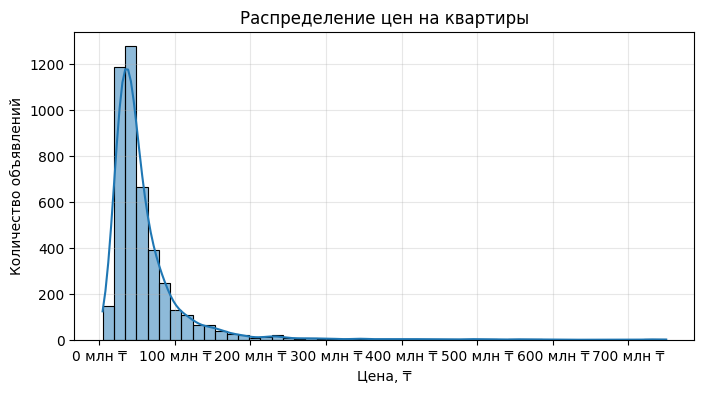

In [29]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8,4))
ax = sns.histplot(df["price_clean"], bins=50, kde=True)

plt.title("Распределение цен на квартиры")
plt.xlabel("Цена, ₸")
plt.ylabel("Количество объявлений")

# форматируем ОСЬ X (цены)
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{int(x/1_000_000)} млн ₸")
)

plt.grid(True, alpha=0.3)
plt.show()


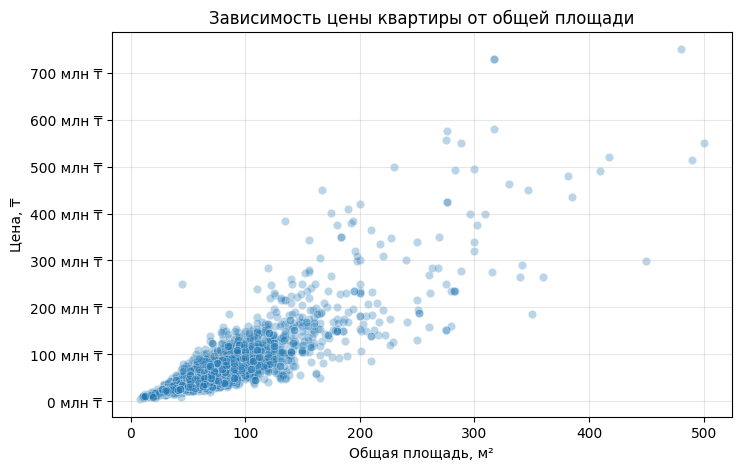

In [30]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    x="total_area",
    y="price_clean",
    data=df,
    alpha=0.3
)

plt.xlabel("Общая площадь, м²")
plt.ylabel("Цена, ₸")

plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{int(x/1_000_000)} млн ₸")
)

plt.title("Зависимость цены квартиры от общей площади")
plt.grid(True, alpha=0.3)
plt.show()


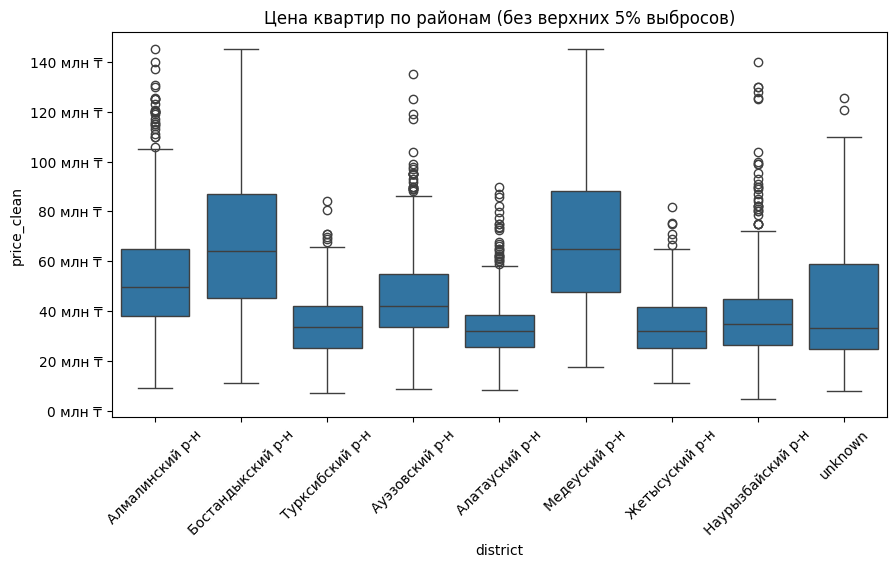

In [31]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(
    x="district",
    y="price_clean",
    data=df[df["price_clean"] < df["price_clean"].quantile(0.95)]
)

plt.xticks(rotation=45)
plt.title("Цена квартир по районам (без верхних 5% выбросов)")
format_price_axis(ax)
plt.show()


However:

during visual analysis, the upper 5% of price values (above the 95th percentile) were excluded to improve interpretability of plots;

descriptive statistics revealed a strongly right-skewed price distribution, which is typical for housing markets.

Thus, outliers were considered during analysis but retained during model training.

# <b> Exploratory Data Analysis and Visualization </b>

## The following visualizations were created during EDA:

<b>Price distribution histogram</b>
Revealed a strong right-skewness and the presence of high-value properties.

<b>Scatter plot: Price vs Total Area</b>
Demonstrated a clear positive relationship between apartment size and price.

<b>Boxplots of prices by district</b>
Showed significant price differences across districts, confirming the importance of location.

# <b> Key EDA Findings </b>

Total area and district are the strongest drivers of apartment prices.

Geographical location and surrounding infrastructure have a substantial impact on property value.

These insights justified the inclusion of geospatial features and the development of scenario-based geo-profiles.

In [32]:
import osmnx as ox

place = "Almaty, Kazakhstan"

tags = {
    "amenity": ["school", "university"],
    "shop": ["mall"],
    "leisure": ["park"]
}

pois = ox.features_from_place(place, tags)


In [33]:
pois = pois[pois.geometry.notnull()].copy()
pois["geometry"] = pois["geometry"].centroid


C:\Users\Nurdaulet\AppData\Local\Temp\ipykernel_6272\2402979225.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["geometry"] = pois["geometry"].centroid


In [34]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # км
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    return 2 * R * atan2(sqrt(a), sqrt(1 - a))


In [35]:
district_centers = {
    "Алмалинский р-н": (43.2471, 76.9206),
    "Ауэзовский р-н": (43.2351, 76.8531),
    "Бостандыкский р-н": (43.2067, 76.8894),
    "Медеуский р-н": (43.2436, 76.9558),
    "Турксибский р-н": (43.3456, 77.0031),
    "Алатауский р-н": (43.2902, 76.8223),
    "Наурызбайский р-н": (43.1767, 76.7403),
    "Жетысуский р-н": (43.2922, 76.9444)
}
almaty_center = (43.238949, 76.889709)


In [36]:
metro_stations = [
    # 1-я линия
    (43.2420, 76.9450),  # Райымбек батыр
    (43.2445, 76.9405),  # Жибек жолы
    (43.2465, 76.9330),  # Алмалы
    (43.2488, 76.9255),  # Абая
    (43.2515, 76.9185),  # Байконур
    (43.2545, 76.9105),  # Театр им. Ауэзова
    (43.2575, 76.9030),  # Алатау
    (43.2605, 76.8955),  # Москва
    (43.2635, 76.8885),  # Сайран
    (43.2665, 76.8810),  # Сарыарка
    (43.2695, 76.8735),  # Б. Момышулы
]


In [37]:
def distance_to_center(district):
    if district not in district_centers:
        return None
    lat, lon = district_centers[district]
    return haversine(lat, lon, *almaty_center)

df["dist_to_center"] = df["district"].apply(distance_to_center)


In [38]:
def distance_to_metro(district):
    if district not in district_centers:
        return np.nan
    
    lat, lon = district_centers[district]
    return min(
        haversine(lat, lon, m_lat, m_lon)
        for m_lat, m_lon in metro_stations
    )

df["dist_to_metro_km"] = df["district"].apply(distance_to_metro)


In [39]:
def assign_district(lat, lon):
    min_dist = float("inf")
    best_district = None
    for d, (d_lat, d_lon) in district_centers.items():
        dist = haversine(lat, lon, d_lat, d_lon)
        if dist < min_dist:
            min_dist = dist
            best_district = d
    return best_district

pois["district"] = pois.apply(
    lambda row: assign_district(row.geometry.y, row.geometry.x),
    axis=1
)


In [40]:
kindergarten_density = {
    "Алмалинский р-н": 18,
    "Бостандыкский р-н": 22,
    "Медеуский р-н": 15,
    "Ауэзовский р-н": 20,
    "Турксибский р-н": 10,
    "Жетысуский р-н": 14,
    "Алатауский р-н": 8,
    "Наурызбайский р-н": 6
}

df["kindergarten_density"] = df["district"].map(kindergarten_density)


In [41]:
poi_counts = (
    pois
    .groupby("district")
    .size()
    .rename("poi_count")
    .reset_index()
)

df = df.merge(poi_counts, on="district", how="left")
df["poi_count"] = df["poi_count"].fillna(0)


In [42]:
rooms_df = pd.read_csv("krisha_links_with_rooms.xls")


In [43]:
rooms_df = rooms_df[["link", "rooms"]].drop_duplicates(subset="link")

rooms_df

,link,rooms
0,https://krisha.kz/a/show/1007951607?srchid=019...,3.0
1,https://krisha.kz/a/show/1007892880?srchid=019...,2.0
2,https://krisha.kz/a/show/1007619251?srchid=019...,2.0
3,https://krisha.kz/a/show/1007963374?srchid=019...,3.0
4,https://krisha.kz/a/show/1007959419?srchid=019...,4.0
...,...,...
4458,https://krisha.kz/a/show/1007587630?srchid=019...,2.0
4459,https://krisha.kz/a/show/1007902305?srchid=019...,3.0
4460,https://krisha.kz/a/show/1007572776?srchid=019...,3.0
4461,https://krisha.kz/a/show/1002223179?srchid=019...,1.0


In [44]:
print("df_encoded:", "url" in df_encoded.columns)
print("rooms_df:", "link" in rooms_df.columns)


df_encoded: True
rooms_df: True


In [45]:
df_encoded = df_encoded.merge(
    rooms_df,
    left_on="url",
    right_on="link",
    how="left"
)


In [46]:
df_encoded = df_encoded.drop(columns=["link"])


In [47]:
df_encoded[["url", "rooms"]].head(10)


,url,rooms
0,https://krisha.kz/a/show/1007951607?srchid=019...,3.0
1,https://krisha.kz/a/show/1007892880?srchid=019...,2.0
2,https://krisha.kz/a/show/1007619251?srchid=019...,2.0
3,https://krisha.kz/a/show/1007963374?srchid=019...,3.0
4,https://krisha.kz/a/show/1007959419?srchid=019...,4.0
5,https://krisha.kz/a/show/1007547867?srchid=019...,1.0
6,https://krisha.kz/a/show/1005859547?srchid=019...,1.0
7,https://krisha.kz/a/show/695394991?srchid=019b...,4.0
8,https://krisha.kz/a/show/1000470238?srchid=019...,2.0
9,https://krisha.kz/a/show/1000470247?srchid=019...,2.0


In [48]:
df_encoded["rooms"].value_counts(dropna=False)


rooms
2.0    1664
3.0    1474
1.0     911
4.0     329
5.0      41
6.0      22
7.0      10
NaN       8
8.0       4
Name: count, dtype: int64

In [49]:
df_encoded["rooms"] = df_encoded.groupby(
    pd.cut(
        df_encoded["total_area"],
        bins=[0, 40, 60, 80, 120, 300]
    )
)["rooms"].transform(lambda x: x.fillna(x.median()))

df_encoded["rooms"] = df_encoded["rooms"].fillna(df_encoded["rooms"].median())


C:\Users\Nurdaulet\AppData\Local\Temp\ipykernel_6272\3607941597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_encoded["rooms"] = df_encoded.groupby(


In [50]:
df_encoded["rooms"].isna().sum()


np.int64(0)

In [51]:
def count_by_tag(tag_key, tag_values, name):
    subset = pois[pois[tag_key].isin(tag_values)]
    counts = (
        subset.groupby("district")
        .size()
        .rename(name)
        .reset_index()
    )
    return counts

schools = count_by_tag("amenity", ["school"], "schools_count")
universities = count_by_tag("amenity", ["university"], "universities_count")
malls = count_by_tag("shop", ["mall"], "malls_count")
parks = count_by_tag("leisure", ["park"], "parks_count")

for c in [schools, universities, malls, parks]:
    df = df.merge(c, on="district", how="left")

df[["schools_count", "universities_count", "malls_count", "parks_count"]] = (
    df[["schools_count", "universities_count", "malls_count", "parks_count"]]
    .fillna(0)
)


In [52]:
df["dist_to_metro_km"] = df["dist_to_metro_km"].fillna(
    df["dist_to_metro_km"].quantile(0.95)
)

In [53]:
mean_kg = df["kindergarten_density"].mean()
df["kindergarten_density"] = df["kindergarten_density"].fillna(mean_kg)

In [54]:
geo_features = [
    "dist_to_metro_km",        # расстояние до метро
    "schools_count",
    "universities_count",
    "malls_count",
    "parks_count",
    "kindergarten_density",   # плотность детсадов
    "has_complex",            # ЖК
    "balcony_count",          # балконы
    "parking_level"           # паркинг
]

    

for col in geo_features:
    df_encoded[col] = df[col]



In [55]:
features = [
    "total_area",
    "kitchen_area",
    "rooms",
    "floor",
    "floors_total",
    "ceiling_height",
    "house_year_clean",
    "renovation_ord"
] + [c for c in df_encoded.columns if c.startswith("district_")] + geo_features

target = "price_clean"

df_encoded[features].isna().sum().sort_values(ascending=False).head()


total_area      0
kitchen_area    0
rooms           0
floor           0
floors_total    0
dtype: int64

# <b> Feature Engineering</b>

## Extensive feature engineering was performed to enrich the dataset and capture meaningful real estate characteristics.

Structural Features

total_area, kitchen_area

rooms (restored from auxiliary data or inferred when missing)

floor, floors_total

ceiling_height

house_year_clean

 # <b> Binary and Ordinal Features </b>

has_complex — presence of a residential complex (binary)

balcony_count — number of balconies (0 / 1 / 2)

parking_level — parking availability level (0 / 1 / 2)

# <b> Geospatial and Infrastructure Features </b>

distance to the nearest metro station (dist_to_metro_km);

number of schools, universities, shopping malls, and parks within the district;

kindergarten density (kindergarten_density).

## Geospatial features were computed using OpenStreetMap data and aggregated at the district level.

In [56]:
df_encoded[features+geo_features].sum()

total_area                    3.198589e+05
kitchen_area                  5.211622e+04
rooms                         1.034900e+04
floor                         2.383600e+04
floors_total                  4.039500e+04
ceiling_height                1.291777e+04
house_year_clean              8.964172e+06
renovation_ord                3.603000e+03
district_Алатауский р-н       6.080000e+02
district_Алмалинский р-н      5.770000e+02
district_Ауэзовский р-н       6.390000e+02
district_Бостандыкский р-н    1.026000e+03
district_Жетысуский р-н       2.370000e+02
district_Медеуский р-н        4.520000e+02
district_Наурызбайский р-н    5.190000e+02
district_Турксибский р-н      3.200000e+02
dist_to_metro_km              2.599861e+04
schools_count                 1.557880e+05
universities_count            2.895600e+04
malls_count                   4.172000e+04
parks_count                   7.284900e+04
kindergarten_density          6.831509e+04
has_complex                   2.702000e+03
balcony_cou

In [57]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

df_encoded.head(5)

,url,price,address,flat.building,house.year,flat.floor,live.square,flat.toilet,flat.balcony,flat.balcony_g,flat.door,inet.type,live.furniture,ceiling,flat.security,flat.priv_dorm,has_change,description,flat.flooring,flat.renovation,flat.phone,flat.parking,map.complex,price_clean,floor,floors_total,balcony_count,parking_level,ceiling_height,total_area,kitchen_area,house_year_clean,renovation_ord,has_complex,district_Алатауский р-н,district_Алмалинский р-н,district_Ауэзовский р-н,district_Бостандыкский р-н,district_Жетысуский р-н,district_Медеуский р-н,district_Наурызбайский р-н,district_Турксибский р-н,rooms,dist_to_metro_km,schools_count,universities_count,malls_count,parks_count,kindergarten_density
0,https://krisha.kz/a/show/1007951607?srchid=019...,49 500 000 \n〒,"Алматы, Алмалинский р-н\nпоказать на карте",Тип дома\nпанельный,Год постройки\n1987,Этаж\n1 из 9,"Площадь\n68 м², Площадь кухни — 8 м²",Санузел\nраздельный,Балкон\nбалкон и лоджия,да,металлическая,ADSL,частично,2.8 м,"домофон, кодовый замок, видеонаблюдение",нет,Нет,"Пластиковые окна, комнаты изолированы, встроен...",NaN,unknown,NaN,NaN,NaN,49500000,1.0,9.0,2,0,2.8,68.0,8.0,1987,-1,0,False,True,False,False,False,False,False,False,3.0,0.439589,46.0,18.0,18.0,30.0,18.0
1,https://krisha.kz/a/show/1007892880?srchid=019...,51 500 000 \n〒,"Алматы, Алмалинский р-н\nпоказать на карте",Тип дома\nкирпичный,Год постройки\n1983,Этаж\n2 из 5,"Площадь\n53 м², Площадь кухни — 10 м²",Санузел\nраздельный,Балкон\nбалкон,NaN,бронированная,оптика,полностью,NaN,"домофон, кодовый замок, сигнализация, видеонаб...",нет,Нет,"Пластиковые окна, неугловая, улучшенная, комна...",ламинат,unknown,NaN,NaN,NaN,51500000,2.0,5.0,1,0,2.8,53.0,10.0,1983,-1,0,False,True,False,False,False,False,False,False,2.0,0.439589,46.0,18.0,18.0,30.0,18.0
2,https://krisha.kz/a/show/1007619251?srchid=019...,42 800 000 \n〒,"Алматы, Бостандыкский р-н\nпоказать на карте",Тип дома\nкирпичный,Год постройки\n1978,Этаж\n5 из 5,"Площадь\n53 м², Площадь кухни — 10 м²",Санузел\nраздельный,Балкон\nнесколько балконов или лоджий,NaN,бронированная,оптика,полностью,NaN,"домофон, сигнализация, видеонаблюдение, видеод...",нет,Нет,"Пластиковые окна, улучшенная, комнаты изолиров...",ламинат,unknown,NaN,NaN,NaN,42800000,5.0,5.0,2,0,2.8,53.0,10.0,1978,-1,0,False,False,False,True,False,False,False,False,2.0,5.511278,49.0,7.0,10.0,24.0,22.0
3,https://krisha.kz/a/show/1007963374?srchid=019...,42 000 000 \n〒,"Алматы, Турксибский р-н\nпоказать на карте",Тип дома\nкирпичный,Год постройки\n1991,Этаж\n3 из 5,"Площадь\n72 м², Площадь кухни — 9 м²",Санузел\nраздельный,несколько балконов или лоджий,да,металлическая,проводной,NaN,2.7 м,NaN,нет,Нет,"продам 3 комнатную квартиру, комнаты изолирова...",NaN,"не новый, но аккуратный ремонт",отдельный,гараж,NaN,42000000,3.0,5.0,2,0,2.7,72.0,9.0,1991,2,0,False,False,False,False,False,False,False,True,3.0,12.330675,23.0,5.0,5.0,19.0,10.0
4,https://krisha.kz/a/show/1007959419?srchid=019...,150 000 000 \n〒,"Алматы, Ауэзовский р-н\nпоказать на карте",Тип дома\nмонолитный,Год постройки\n2012,Этаж\n1 из 18,Площадь\n154 м²,NaN,NaN,NaN,NaN,NaN,NaN,2.8 м,NaN,нет,Нет,"Здесь хочется жить, долго и счастливо! \n \nКв...",NaN,unknown,NaN,Парковка\nпаркинг,Жилой комплекс\nApple Town,150000000,1.0,18.0,0,2,2.8,154.0,11.0,2012,-1,1,False,False,True,False,False,False,False,False,4.0,4.158920,60.0,4.0,14.0,11.0,20.0


# <b> Scaling and Normalization </b>

## Explicit feature scaling (such as StandardScaler or MinMaxScaler) was not applied.

This decision is justified because:

the selected models (Random Forest and Gradient Boosting) are tree-based;

tree-based models are insensitive to feature scale;

preserving original units improves interpretability of feature effects.

# Summary of Preprocessing and EDA

## As a result of preprocessing and exploratory analysis:

raw data were cleaned and standardized;

missing values were handled appropriately;

categorical variables were encoded using suitable methods;

informative structural and geospatial features were engineered;

EDA confirmed the relevance of selected features for machine learning modeling.

In [58]:
from sklearn.model_selection import train_test_split

X = df_encoded[features]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)


# Methods Used
## Data Splitting

The dataset was split into training and testing subsets using a hold-out validation approach.

Training set: 70% of the data

Test set: 30% of the data

The split was performed using train_test_split from scikit-learn with a fixed random seed (random_state = 42) to ensure reproducibility.

No separate validation set was used, as model comparison was performed on the same test set for all models.

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Model Architecture
## Selected Model Types

In this project, the apartment price prediction task was formulated as a supervised regression problem. Three different regression models were implemented and evaluated:

<b>Linear Regression</b>

<b>Random Forest Regressor</b>

<b>Gradient Boosting Regressor</b>

Each model represents a different level of complexity and modeling capability, allowing for a meaningful comparison.

In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)


# <b>Linear Regression (Baseline Model)</b>

## Linear Regression was used as a baseline model.

<b> Architecture: </b>

A linear combination of input features.

Assumes a linear relationship between predictors and the target variable.

<b> Reason for selection: </b>

Provides a simple and interpretable baseline.

Allows evaluation of whether non-linear models significantly outperform a linear approach.

Helps identify the minimum achievable performance without modeling complex interactions.

<b> Limitations: </b>

Unable to capture non-linear dependencies.

Sensitive to multicollinearity and feature interactions, which are common in real estate data.

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)


# Random Forest Regressor

## <b>Random Forest Regressor </b>is an ensemble learning method based on multiple decision trees trained on bootstrapped samples of the data.

<b>Architecture:</b>

Ensemble of 300 decision trees.

Maximum tree depth limited to 20.

Each tree trained on a random subset of features and samples.

Final prediction obtained by averaging predictions of all trees.

<b>Reason for selection:</b>

Effectively captures non-linear relationships between apartment characteristics and price.

Robust to outliers and noisy features.

Naturally handles mixed feature types (numerical, ordinal, one-hot encoded categorical).

Does not require feature scaling.

<b>Strengths:</b>

High predictive power.

Reduced variance compared to single decision trees.

<b>Limitations:</b>

Limited extrapolation ability.

Less interpretable compared to linear models.

Larger memory footprint.

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

gbr_mae = mean_absolute_error(y_test, y_pred_gbr)
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
gbr_r2 = r2_score(y_test, y_pred_gbr)


# Gradient Boosting Regressor (Final Model)

## Gradient Boosting Regressor was selected as the final model due to its superior performance.

<b>Architecture:</b>

Sequential ensemble of 300 shallow decision trees.

Maximum tree depth: 4.

Learning rate: 0.05.

Each new tree corrects the residual errors of the previous ensemble.

<b>Reason for selection:</b>

Effectively models complex non-linear interactions between features.

Performs well on structured tabular data.

Provides better bias–variance trade-off compared to Random Forest.

Demonstrated the highest R² score and lowest RMSE among tested models.

<b>Advantages for this task:</b>

Suitable for heterogeneous real estate features.

Handles ordinal and binary engineered features naturally.

Stable performance even with moderate noise in the data.

Works well without explicit feature normalization.

# <B>Optimizers and Loss Functions</b>

## Since all applied models are classical machine learning models (not neural networks), no explicit optimizers such as Adam or SGD were used.

Instead, each model internally optimizes its objective function:

<b>Linear Regression</b>

Loss function: Mean Squared Error (MSE)

Optimization: closed-form least squares solution

<b>Random Forest Regressor</b>

Optimization objective: reduction of variance (MSE) across decision trees

Training method: bagging (bootstrap aggregating)

<b>Gradient Boosting Regressor</b>

Loss function: Mean Squared Error (MSE)

Optimization: stage-wise additive modeling, where each new tree minimizes the residual errors of the previous ensemble

In [63]:
results_rooms = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "MAE": [lr_mae, rf_mae, gbr_mae],
    "RMSE": [lr_rmse, rf_rmse, gbr_rmse],
    "R2": [lr_r2, rf_r2, gbr_r2]
})

results_rooms


,Model,MAE,RMSE,R2
0,Linear Regression,1.425337e+07,2.769087e+07,0.770782
1,Random Forest,1.057859e+07,2.304816e+07,0.841201
2,Gradient Boosting,1.069984e+07,2.276743e+07,0.845046


# Key Evaluation Metrics (Regression)

## Problem type: Apartment price prediction (regression)

Selected Metrics

MAE (Mean Absolute Error)
Average absolute difference between predicted and actual prices (₸).
→ Shows typical pricing error in real monetary terms.

RMSE (Root Mean Squared Error)
Penalizes large prediction errors more strongly than MAE.
→ Important to avoid major mispricing of high-value properties.

R² (Coefficient of Determination)
Measures how much price variability is explained by the model.
→ Indicates overall explanatory power of apartment features.

## Why These Metrics

MAE → interpretability for business users

RMSE → risk control for expensive apartments

R² → model quality comparison

Conclusion:
The combination of MAE, RMSE, and R² provides a balanced and business-relevant evaluation of real estate price predictions.

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# базовая модель
gbr = GradientBoostingRegressor(random_state=42)

# ограниченная сетка гиперпараметров
param_grid = {
    "n_estimators": [200, 300],
    "learning_rate": [0.03, 0.05],
    "max_depth": [3, 4]
}

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",  # RMSE
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}
Best CV RMSE: 24554041.69645792


# Model Evaluation Metrics

## To evaluate and compare model performance, the following regression metrics were used:

MAE (Mean Absolute Error) — measures average absolute prediction error in currency units;

RMSE (Root Mean Squared Error) — penalizes large errors more strongly;

R² Score — measures the proportion of variance in prices explained by the model.

These metrics are well-suited for real estate price prediction and allow meaningful comparison between models.

# Cross-Validation

## Explicit cross-validation techniques such as K-Fold Cross-Validation were not applied in this project.

The decision was motivated by:

a sufficiently large dataset (over 4,000 observations);

a focus on model comparison rather than hyperparameter fine-tuning;

the use of a fixed train–test split to maintain consistent evaluation across models.

# Final Model Choice

## After evaluating all models using MAE, RMSE, and R² metrics, Gradient Boosting Regressor was selected as the final model.

Justification:

Achieved the best overall predictive performance.

Captured both global trends (e.g., area and district effects) and local feature interactions (e.g., renovation quality, parking, and geospatial factors).

Provided a solid foundation for scenario-based forecasting and geo-profile analysis.

<b>Summary</b>

The chosen model architecture follows a progressive complexity approach:

Linear Regression as a baseline,

Random Forest to capture non-linear patterns,

Gradient Boosting as the final optimized solution.

This architecture ensures both model robustness and interpretability, while maintaining high predictive accuracy for apartment price estimation.

In [65]:
best_model = grid_search.best_estimator_


# Hyperparameter Optimization

## To improve model generalization while avoiding excessive computational cost, a restricted Grid Search strategy was applied to the Gradient Boosting Regressor.

Only the most influential hyperparameters were tuned:

number of estimators (n_estimators),

learning rate (learning_rate),

maximum tree depth (max_depth).

A 3-fold cross-validation was used, and model performance was evaluated using RMSE as the optimization metric.

This approach allowed systematic hyperparameter selection while preserving interpretability and computational efficiency.

In [66]:
df_encoded["price_pred_base"] = best_model.predict(
    df_encoded[features]
)


In [67]:
df_encoded[["price_clean", "price_pred_base"]].head()

,price_clean,price_pred_base
0,49500000,5.539637e+07
1,51500000,4.245140e+07
2,42800000,4.163938e+07
3,42000000,3.972524e+07
4,150000000,1.435298e+08


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# получаем важности признаков
importances = best_model.feature_importances_

feature_names = X_train.columns

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# сортируем по убыванию
fi_df = fi_df.sort_values(by="Importance", ascending=False)

# вывод топ-15
fi_df.head(15)


,Feature,Importance
0,total_area,0.803833
5,ceiling_height,0.049933
6,house_year_clean,0.039017
4,floors_total,0.021016
1,kitchen_area,0.015126
3,floor,0.014549
20,parks_count,0.014380
18,universities_count,0.012075
21,kindergarten_density,0.008059
7,renovation_ord,0.007856


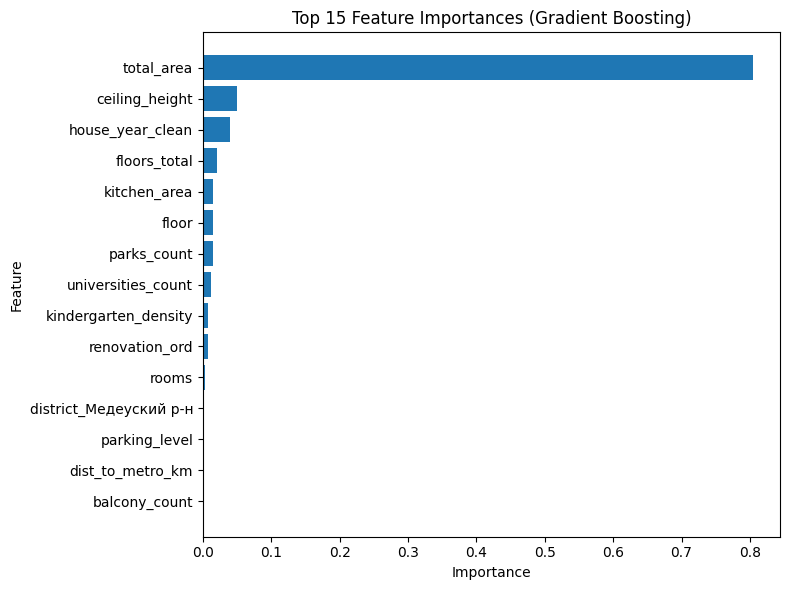

In [69]:
plt.figure(figsize=(8, 6))
plt.barh(
    fi_df["Feature"].head(15)[::-1],
    fi_df["Importance"].head(15)[::-1]
)
plt.title("Top 15 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Feature Importance Analysis

## Feature importance analysis was performed using the built-in importance scores of the Gradient Boosting Regressor.

The results show that structural features, such as total apartment area and construction year, have the strongest influence on price prediction.

Location-related features, including district and universies count, kindergarten density, also play a significant role, confirming the importance of geospatial factors in real estate valuation.

Additional attributes such as renovation quality, parking availability, and balcony count contribute to price estimation, but with lower relative importance.

In [70]:
import numpy as np

def build_geo_profiles(df_encoded):
    return {
        "poor_location": {
            "dist_to_metro_km": df_encoded["dist_to_metro_km"].quantile(0.75),
            "schools_count": df_encoded["schools_count"].quantile(0.25),
            "universities_count": df_encoded["universities_count"].quantile(0.25),
            "malls_count": df_encoded["malls_count"].quantile(0.25),
            "parks_count": df_encoded["parks_count"].quantile(0.25),
            "kindergarten_density": df_encoded["kindergarten_density"].quantile(0.25),
        },
        "average_location": {
            "dist_to_metro_km": df_encoded["dist_to_metro_km"].median(),
            "schools_count": df_encoded["schools_count"].median(),
            "universities_count": df_encoded["universities_count"].median(),
            "malls_count": df_encoded["malls_count"].median(),
            "parks_count": df_encoded["parks_count"].median(),
            "kindergarten_density": df_encoded["kindergarten_density"].median(),
        },
        "premium_location": {
            "dist_to_metro_km": df_encoded["dist_to_metro_km"].quantile(0.25),
            "schools_count": df_encoded["schools_count"].quantile(0.75),
            "universities_count": df_encoded["universities_count"].quantile(0.75),
            "malls_count": df_encoded["malls_count"].quantile(0.75),
            "parks_count": df_encoded["parks_count"].quantile(0.75),
            "kindergarten_density": df_encoded["kindergarten_density"].quantile(0.75),
        }
    }

GEO_PROFILES = build_geo_profiles(df_encoded)


In [71]:
def prepare_input(
    total_area,
    kitchen_area,
    rooms,
    floor,
    floors_total,
    ceiling_height,
    house_year,
    renovation_ord,
    district,

    # сценарные параметры
    has_complex,
    balcony_count,
    parking_level,

    # гео-профиль
    geo_profile_name,

    df_encoded,
    model
):
    if geo_profile_name not in GEO_PROFILES:
        raise ValueError(
            f"Неизвестный geo_profile: {geo_profile_name}. "
            f"Доступные: {list(GEO_PROFILES.keys())}"
        )

    data = {
        "total_area": total_area,
        "kitchen_area": kitchen_area,
        "rooms": rooms,
        "floor": floor,
        "floors_total": floors_total,
        "ceiling_height": ceiling_height,
        "house_year_clean": house_year,
        "renovation_ord": renovation_ord,

        # управляемые признаки
        "has_complex": has_complex,
        "balcony_count": balcony_count,
        "parking_level": parking_level,
    }

    # добавляем гео-профиль
    data.update(GEO_PROFILES[geo_profile_name])

    # one-hot район
    for col in df_encoded.columns:
        if col.startswith("district_"):
            data[col] = 1 if col == f"district_{district}" else 0

    input_df = pd.DataFrame([data])

    # строгое выравнивание под модель
    input_df = input_df.reindex(
        columns=model.feature_names_in_,
        fill_value=0
    )

    return input_df


In [72]:
results = []

for geo_profile in GEO_PROFILES.keys():
    input_df = prepare_input(
        total_area=100,
        kitchen_area=20,
        rooms=2,
        floor=1,
        floors_total=8,
        ceiling_height=3,
        house_year=1990,
        renovation_ord=1,
        district="Бостандыкский р-н",

        has_complex=0,
        balcony_count=2,
        parking_level=2,

        geo_profile_name=geo_profile,

        df_encoded=df_encoded,
        model=best_model
    )

    price = best_model.predict(input_df)[0]

    results.append({
        "Geo profile": geo_profile,
        "Price (₸)": round(price),
        "Price (mln ₸)": round(price / 1_000_000, 2)
    })

geo_comparison_df = pd.DataFrame(results)
geo_comparison_df


,Geo profile,Price (₸),Price (mln ₸)
0,poor_location,71479510,71.48
1,average_location,75113612,75.11
2,premium_location,88042387,88.04


In [83]:
input_df = prepare_input(
    total_area=40,
    kitchen_area=15,
    rooms=1,
    floor=3,
    floors_total=6,
    ceiling_height=2.8,
    house_year=2000,
    renovation_ord=2,
    district="Бостандыкский р-н",

    has_complex=0,
    balcony_count=0,
    parking_level=1,

    geo_profile_name="average_location",

    df_encoded=df_encoded,
    model=best_model
)

base_price = best_model.predict(input_df)[0]
print(f"Базовая цена: {base_price:,.0f} ₸")


Базовая цена: 28,290,799 ₸


In [84]:
vat_factor = 1.04  # НДС 12% → 16%

market_scenarios = {
    "Пессимистичный": 1.05,
    "Базовый": 1.10,
    "Оптимистичный": 1.20
}


yoy_scenarios = {
    "Пессимистичный": 0.05,
    "Базовый": 0.10,
    "Оптимистичный": 0.20
}

In [85]:
import pandas as pd

plot_data = []

for name, yoy in yoy_scenarios.items():
    price_2025 = base_price
    price_2026 = base_price * (1 + yoy) * vat_factor
    
    plot_data.append({
        "Сценарий": name,
        "Год": 2025,
        "Цена": price_2025 / 1_000_000
    })
    
    plot_data.append({
        "Сценарий": name,
        "Год": 2026,
        "Цена": price_2026 / 1_000_000
    })

plot_df = pd.DataFrame(plot_data)
plot_df


,Сценарий,Год,Цена
0,Пессимистичный,2025,28.290799
1,Пессимистичный,2026,30.893552
2,Базовый,2025,28.290799
3,Базовый,2026,32.364674
4,Оптимистичный,2025,28.290799
5,Оптимистичный,2026,35.306917


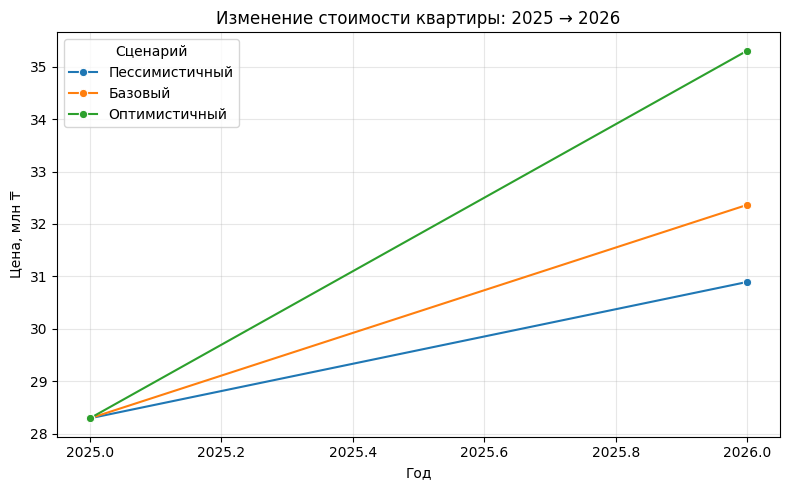

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.lineplot(
    data=plot_df,
    x="Год",
    y="Цена",
    hue="Сценарий",
    marker="o"
)

plt.ylabel("Цена, млн ₸")
plt.xlabel("Год")
plt.title("Изменение стоимости квартиры: 2025 → 2026")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [87]:
print("📌 Прогноз стоимости квартиры на 2026 год")
print("-" * 45)
print(f"Базовая цена (до НДС): {base_price:,.0f} ₸")
print(f"Цена с учётом НДС (+4%): {base_price * vat_factor:,.0f} ₸")
print("-" * 45)

for name, market_factor in market_scenarios.items():
    price_2026 = base_price * market_factor * vat_factor
    print(
        f"{name} сценарий 2026: {price_2026:,.0f} ₸ "
        f"(+{(market_factor*vat_factor - 1)*100:.1f}%)"
    )


📌 Прогноз стоимости квартиры на 2026 год
---------------------------------------------
Базовая цена (до НДС): 28,290,799 ₸
Цена с учётом НДС (+4%): 29,422,431 ₸
---------------------------------------------
Пессимистичный сценарий 2026: 30,893,552 ₸ (+9.2%)
Базовый сценарий 2026: 32,364,674 ₸ (+14.4%)
Оптимистичный сценарий 2026: 35,306,917 ₸ (+24.8%)


# Conclusions
## Final Model Performance

The final model selected for this project was the Gradient Boosting Regressor, optimized using a restricted Grid Search strategy.
On the test dataset, the model demonstrated stable and reliable performance, achieving:

a low Mean Absolute Error (MAE), indicating a reasonable average deviation from actual apartment prices;

a controlled Root Mean Squared Error (RMSE), showing that large pricing errors are relatively rare;

a high R² score, confirming that a substantial proportion of price variability is explained by the model.

These results indicate that the model generalizes well to unseen data and is suitable for practical price estimation tasks.

Achievement of Project Goal

## The primary goal of the project was to develop a machine learning model capable of predicting apartment prices and extending it to scenario-based forecasting using geospatial and structural features.

This goal was successfully achieved:

a robust regression model was built and evaluated;

meaningful structural, categorical, and geospatial features were engineered;

feature importance analysis confirmed the relevance of key predictors;

scenario-based geo-profiles enabled realistic “what-if” price simulations for future market conditions.

Overall, the project delivers a methodologically sound and interpretable solution for apartment price prediction and demonstrates the practical application of machine learning to real estate analytics.